In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [21]:
df = pd.read_csv(r"C:\Users\syedz\Desktop\cardataset\CAR DETAILS FROM CAR DEKHO.csv")
print(df.head())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [22]:
print(df.columns)



Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [23]:
df['fuel'] = df['fuel'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4})
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})
df['age'] = 2025 - df['year']
df.dropna(inplace=True)
df['sold_fast'] = (df['selling_price'] > df['selling_price'].median()).astype(int)


In [24]:
X = df[['km_driven', 'age', 'fuel', 'transmission']]
y = df['sold_fast']


In [25]:


X = df[['km_driven', 'age', 'fuel', 'transmission']]
y = df['sold_fast']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Model Accuracy: 0.8006912442396313
Confusion Matrix:
 [[341  93]
 [ 80 354]]


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8006912442396313


In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[341  93]
 [ 80 354]]


In [28]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       434
           1       0.79      0.82      0.80       434

    accuracy                           0.80       868
   macro avg       0.80      0.80      0.80       868
weighted avg       0.80      0.80      0.80       868



In [29]:
new_car = pd.DataFrame([[45000, 4, 1, 0]], columns=['km_driven', 'age', 'fuel', 'transmission'])
# mileage, age, fuel_type, transmission

prediction = model.predict(new_car)

if prediction[0] == 1:
    print("Car will sell fast")
else:
    print("Car will NOT sell fast")



print(classification_report(y_test, y_pred))


Car will sell fast
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       434
           1       0.79      0.82      0.80       434

    accuracy                           0.80       868
   macro avg       0.80      0.80      0.80       868
weighted avg       0.80      0.80      0.80       868



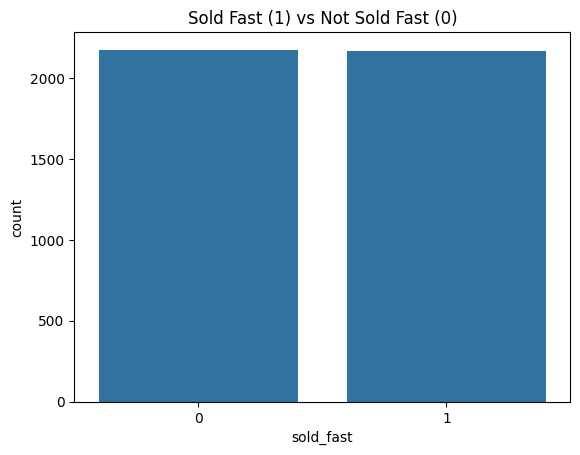

In [31]:
plt.figure()
sns.countplot(x='sold_fast', data=df)
plt.title("Sold Fast (1) vs Not Sold Fast (0)")
plt.show()




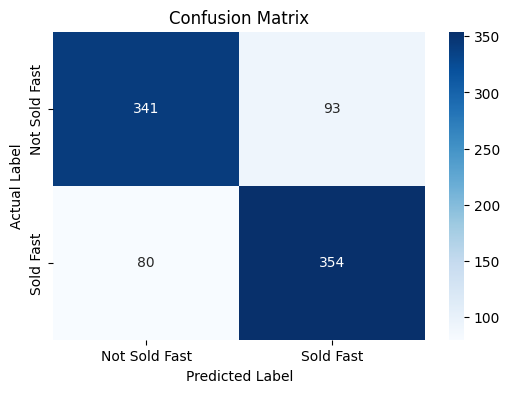

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Sold Fast', 'Sold Fast'],
    yticklabels=['Not Sold Fast', 'Sold Fast']
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()


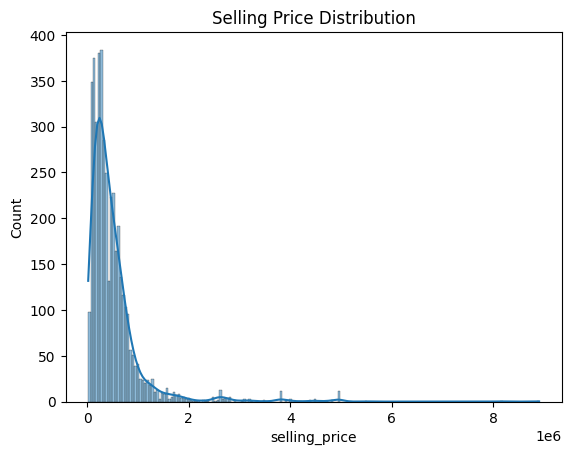

In [33]:
plt.figure()
sns.histplot(df['selling_price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()